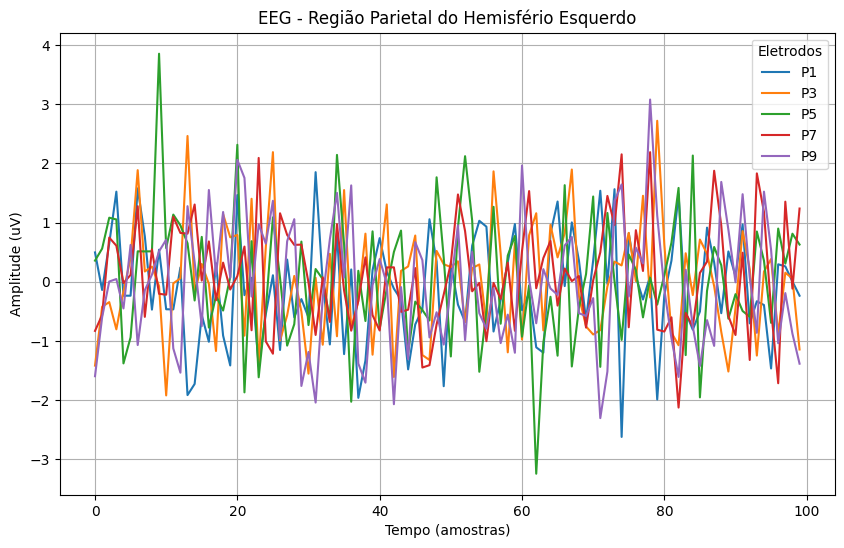

In [ ]:
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt

path = "1.Dados_Anteriores\Raw Empirical EEG Data\EEG_Cat_Study4_Resting_S1.bdf" 
signals, signal_headers, header = highlevel.read_edf(path)

n = len(signals)

fig = plt.figure()
ax = plt.axes()

#print(header)
#print(signal_headers)

eletrodos = []
for i in np.arange(n):
    eletrodos.append (signal_headers[i]["label"])
    print(signal_headers[i]["label"])
    if signal_headers[i]["label"] != "Status":
        ax.plot(signals[i], label = (signal_headers[i]["label"]))
        plt.legend()
    
plt.show()

# Lista de eletrodos
electrodes = [
    "Fp1", "AF7", "AF3", "F1", "F3", "F5", "F7", "FT7", "FC5", "FC3", "FC1", 
    "C1", "C3", "C5", "T7", "TP7", "CP5", "CP3", "CP1", "P1", "P3", "P5", 
    "P7", "P9", "PO7", "PO3", "O1", "Iz", "Oz", "POz", "Pz", "CPz", "Fpz", 
    "Fp2", "AF8", "AF4", "AFz", "Fz", "F2", "F4", "F6", "F8", "FT8", "FC6", 
    "FC4", "FC2", "FCz", "Cz", "C2", "C4", "C6", "T8", "TP8", "CP6", "CP4", 
    "CP2", "P2", "P4", "P6", "P8", "P10", "PO8", "PO4", "O2", "M1", "M2", 
    "NAS", "LVEOG", "RVEOG", "LHEOG", "RHEOG", "NFpz"
]

# Dicionário para armazenar os eletrodos por região e hemisfério
regions = {
    "Hemisfério Esquerdo": {
        "Pré-frontal": ["Fp1"],
        "Frontal": ["AF7", "AF3", "F1", "F3", "F5", "F7"],
        "Temporal": ["FT7", "T7"],
        "Parietal": ["P1", "P3", "P5", "P7", "P9"],
        "Occipital": ["O1"],
        "Central": ["FC5", "FC3", "FC1", "C1", "C3", "C5"]
    },
    "Hemisfério Direito": {
        "Pré-frontal": ["Fp2"],
        "Frontal": ["AF8", "AF4", "F2", "F4", "F6", "F8"],
        "Temporal": ["FT8", "T8"],
        "Parietal": ["P2", "P4", "P6", "P8", "P10"],
        "Occipital": ["O2"],
        "Central": ["FC6", "FC4", "FC2", "C2", "C4", "C6"]
    },
    "Zona Central": {
        "Pré-frontal": ["Fpz", "NFpz"],
        "Frontal": ["AFz", "Fz"],
        "Parietal": ["Pz"],
        "Occipital": ["Oz", "Iz"],
        "Central": ["FCz", "Cz", "CPz", "POz"]
    },
    "Outros": [
        "TP7", "CP5", "CP3", "CP1", "TP8", "CP6", "CP4", "CP2", 
        "PO7", "PO3", "PO8", "PO4", "M1", "M2", "NAS", "LVEOG", 
        "RVEOG", "LHEOG", "RHEOG"
    ]
}

# Função para categorizar os eletrodos
def categorize_electrodes(electrode_list):
    categorized = {
        "Hemisfério Esquerdo": {region: [] for region in regions["Hemisfério Esquerdo"]},
        "Hemisfério Direito": {region: [] for region in regions["Hemisfério Direito"]},
        "Zona Central": {region: [] for region in regions["Zona Central"]},
        "Outros": []
    }
    
    for electrode in electrode_list:
        found = False
        for hemisphere, region_dict in regions.items():
            if hemisphere == "Outros":
                if electrode in region_dict:
                    categorized["Outros"].append(electrode)
                    found = True
                    break
            else:
                for region, electrodes in region_dict.items():
                    if electrode in electrodes:
                        categorized[hemisphere][region].append(electrode)
                        found = True
                        break
            if found:
                break
    
    return categorized

# Categorizar os eletrodos
categorized_electrodes = categorize_electrodes(electrodes)

# Eletrodos da região Parietal do hemisfério esquerdo
parietal_left_electrodes = categorized_electrodes["Hemisfério Esquerdo"]["Parietal"]

# Simulação de dados de EEG para os eletrodos da região Parietal esquerda (100 amostras)
np.random.seed(42)  # Para resultados reproduzíveis
eeg_data = {electrode: np.random.randn(100) for electrode in parietal_left_electrodes}

# Plotar os dados de EEG para cada eletrodo parietal esquerdo
plt.figure(figsize=(10, 6))
for electrode, data in eeg_data.items():
    plt.plot(data, label=electrode)

# Personalizar o gráfico
plt.title("EEG - Região Parietal do Hemisfério Esquerdo")
plt.xlabel("Tempo (amostras)")
plt.ylabel("Amplitude (uV)")
plt.legend(title="Eletrodos")
plt.grid(True)

# Exibir o gráfico
plt.show()
